In [1]:
import os
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pickle
from sklearn.decomposition import PCA
from keras.utils import to_categorical, np_utils
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from mpl_toolkits.mplot3d import Axes3D

Using TensorFlow backend.
c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\cesar\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
directory = 'Dados_completos'
letras = os.listdir(directory) 
num_letras = len(letras)

dataset = pd.DataFrame()

files = {}
for letra in letras:
    files[letra] = os.listdir(directory+'/'+letra)
    
# formated_dict = {}
for letra, value_list in files.items():
#     formated_dict[letra] = []
    for f in value_list:
        with open(directory+"/"+letra+"/"+f) as file:
            lines = [line.strip() for line in file]
            lines = ast.literal_eval(lines[0])
            test = pd.DataFrame(lines)
            test['label'] = letra
            dataset = dataset.append(test, ignore_index = True)

In [3]:
analise = ['f', 't']
new_dataset = dataset[dataset.label==analise[0]].append(dataset[dataset.label==analise[1]], ignore_index=True)
if len(analise) == 3:
    new_dataset = new_dataset.append(dataset[dataset.label==analise[2]], ignore_index=True)
new_dataset = new_dataset.reset_index()

analise = [l.upper() for l in analise]

X = new_dataset.iloc[:,1:31] 
y = new_dataset.iloc[:,31] 

X = X/16384
y = LabelEncoder().fit_transform(y)
y = np_utils.to_categorical(y, len(analise))

In [5]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

In [13]:
principalComponents[1]

array([-0.40677769, -0.44230511, -0.09382152])

In [14]:
n = 3
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(X)

columns = []
for i in range(n):
    columns.append('principal component ' + str(i+1))
principalDf = pd.DataFrame(data = principalComponents
             , columns = columns)
finalDf = pd.concat([principalDf, pd.DataFrame(np.argmax(y, axis=1)) ], axis = 1)

In [15]:
finalDf

,principal component 1,principal component 2,principal component 3,0
0,-0.421136,-0.465948,-0.065971,0
1,-0.406778,-0.442305,-0.093822,0
2,-0.431276,-0.450590,-0.090399,0
3,-0.445187,-0.465224,-0.098182,0
4,-0.436928,-0.468820,-0.086855,0
...,...,...,...,...
1995,1.418017,0.390438,0.242724,1
1996,1.446900,0.414733,0.238300,1
1997,1.422590,0.429329,0.261014,1
1998,1.412574,0.462183,0.232732,1


In [5]:
print(pca.explained_variance_ratio_)
soma = 0
for i in pca.explained_variance_ratio_:
    soma += i
print(soma)

[0.69585139 0.15230982 0.0826832 ]
0.9308444078613777


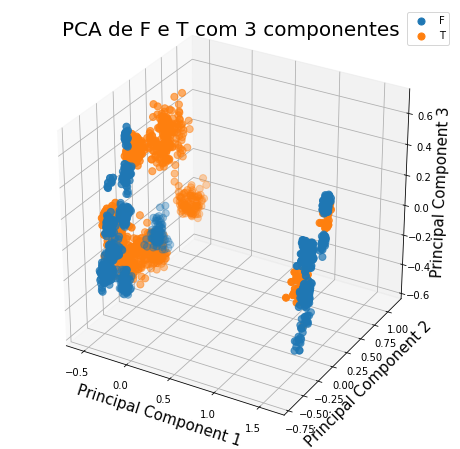

In [6]:
if n==3:
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1, projection='3d') 
elif n == 2:
    fig, ax = plt.subplots()
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
if n==3:
    ax.set_zlabel('Principal Component 3', fontsize = 15)
if len(analise) == 2:
    ax.set_title('PCA de '+ analise[0] + ' e ' + analise[1] +' com '+
                 str(n)+' componentes', fontsize = 20)
elif len(analise) == 3:
    ax.set_title('PCA de '+ analise[0] + ', ' + analise[1] + ' e ' + analise[2]  + 
                 ' com '+str(n)+' componentes', fontsize = 20)
targets = range(len(analise))
for target in targets:
    indicesToKeep = (finalDf.iloc[:,n][finalDf.iloc[:,n]==target])
    if n == 2:
        ax.scatter(finalDf.loc[indicesToKeep.index, 'principal component 1']
                   , finalDf.loc[indicesToKeep.index, 'principal component 2']
    #              ,  finalDf.loc[indicesToKeep.index, 'principal component 3']
                   , s = 50)
    elif n == 3:
        ax.scatter(finalDf.loc[indicesToKeep.index, 'principal component 1']
                   , finalDf.loc[indicesToKeep.index, 'principal component 2']
                 ,  finalDf.loc[indicesToKeep.index, 'principal component 3']
                   , s = 50)
if len(analise) == 2:
    ax.legend(analise, loc='best')
elif len(analise) == 3:
    ax.legend(analise, loc='lower left')
ax.grid()